In [89]:
%load_ext autoreload
%autoreload 2
from keras.utils import to_categorical
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [90]:
import getimages
circle_nparray = getimages.load_images_in_folder_to_nparray("./data/circles/")
square_nparray = getimages.load_images_in_folder_to_nparray("./data/squares/")

In [91]:
from numpy import genfromtxt
circle_locations = genfromtxt('./data/circles/locations.csv', delimiter=',')
square_locations = genfromtxt('./data/squares/locations.csv', delimiter=',')

In [92]:
img_rows = img_cols = 28
input_shape = (img_rows, img_cols, 3)

X = square_nparray # np.concatenate((circle_nparray, square_nparray), axis=0)
X = X.astype('float32')/255
# y_c = np.array([0 for i in range(len(circle_nparray))])
# y_s = np.array([1 for i in range(len(square_nparray))])
# y = to_categorical(np.append(y_c, y_s)) # convert to onehot
y = square_locations # np.concatenate((circle_locations, square_locations))

X_train = X
X_test = X
X_val = X

y_train = y
y_test = y
y_val = y

### 1. Keras

In [93]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

batch_size = 256
num_classes = 2
epochs = 100

#input image dimensions
img_rows, img_cols = 28, 28

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
# model.add(Dense(num_classes, activation='softmax'))
model.add(Dense(4))

model.compile(loss='mean_squared_error',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [94]:
checkpoint = ModelCheckpoint("data/weights/model-{val_acc:.2f}.h5", monitor="val_acc", verbose=1, save_best_only=True,
                                 save_weights_only=True, mode="auto", period=1)


history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val),
          callbacks=[checkpoint])
score = model.evaluate(X_test, y_test, verbose=0)

Train on 512 samples, validate on 512 samples
Epoch 1/100
512/512 [==============================] - 1s 3ms/step - loss: 179.0389 - acc: 0.4434 - val_loss: 132.2708 - val_acc: 0.1602

Epoch 00001: val_acc improved from -inf to 0.16016, saving model to data/weights/model-0.16.h5
Epoch 2/100
512/512 [==============================] - 0s 879us/step - loss: 90.7389 - acc: 0.3203 - val_loss: 48.6984 - val_acc: 0.3789

Epoch 00002: val_acc improved from 0.16016 to 0.37891, saving model to data/weights/model-0.38.h5
Epoch 3/100
512/512 [==============================] - 0s 918us/step - loss: 63.5385 - acc: 0.3457 - val_loss: 31.4111 - val_acc: 0.5977

Epoch 00003: val_acc improved from 0.37891 to 0.59766, saving model to data/weights/model-0.60.h5
Epoch 4/100
512/512 [==============================] - 0s 885us/step - loss: 47.6811 - acc: 0.3027 - val_loss: 49.8493 - val_acc: 0.0781

Epoch 00004: val_acc did not improve from 0.59766
Epoch 5/100
512/512 [==============================] - 0s 928

512/512 [==============================] - 0s 925us/step - loss: 15.9712 - acc: 0.2734 - val_loss: 29.7959 - val_acc: 0.3789

Epoch 00043: val_acc did not improve from 0.59766
Epoch 44/100
512/512 [==============================] - 0s 921us/step - loss: 15.6744 - acc: 0.2871 - val_loss: 29.8990 - val_acc: 0.3789

Epoch 00044: val_acc did not improve from 0.59766
Epoch 45/100
512/512 [==============================] - 0s 938us/step - loss: 15.7067 - acc: 0.2754 - val_loss: 26.6819 - val_acc: 0.3789

Epoch 00045: val_acc did not improve from 0.59766
Epoch 46/100
512/512 [==============================] - 0s 903us/step - loss: 16.1089 - acc: 0.2598 - val_loss: 27.8648 - val_acc: 0.3008

Epoch 00046: val_acc did not improve from 0.59766
Epoch 47/100
512/512 [==============================] - 0s 939us/step - loss: 16.1489 - acc: 0.2871 - val_loss: 29.4873 - val_acc: 0.3008

Epoch 00047: val_acc did not improve from 0.59766
Epoch 48/100
512/512 [==============================] - 0s 861us/ste

512/512 [==============================] - 0s 882us/step - loss: 14.6568 - acc: 0.2598 - val_loss: 35.6185 - val_acc: 0.4551

Epoch 00086: val_acc did not improve from 0.59766
Epoch 87/100
512/512 [==============================] - 0s 891us/step - loss: 14.5096 - acc: 0.2793 - val_loss: 33.7100 - val_acc: 0.3008

Epoch 00087: val_acc did not improve from 0.59766
Epoch 88/100
512/512 [==============================] - 0s 936us/step - loss: 14.2958 - acc: 0.2812 - val_loss: 30.3295 - val_acc: 0.2363

Epoch 00088: val_acc did not improve from 0.59766
Epoch 89/100
512/512 [==============================] - 0s 937us/step - loss: 14.1476 - acc: 0.2559 - val_loss: 35.0652 - val_acc: 0.2363

Epoch 00089: val_acc did not improve from 0.59766
Epoch 90/100
512/512 [==============================] - 0s 946us/step - loss: 14.9278 - acc: 0.2578 - val_loss: 35.6670 - val_acc: 0.2363

Epoch 00090: val_acc did not improve from 0.59766
Epoch 91/100
512/512 [==============================] - 0s 950us/ste

In [88]:
score

[404.5686340332031, 0.5]

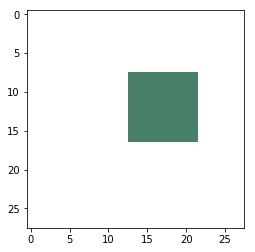

In [153]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(X_test[1])

In [158]:
model.predict(X_test[:1])

array([[7.127011, 7.120087, 4.087321, 4.039061]], dtype=float32)

In [162]:
square_locations[1]

array([17., 12.,  8.,  8.])